In [1]:
import pathlib as pl
import pandas as pd
import datetime as dt
import user_data

In [2]:
path = pl.Path(user_data.csv_wd_daysum)
all_files = path.glob('*.csv')

In [17]:
# Define dataframes
df_day = []
df_night = []
day_files = []
night_files = []

# Daysum Day measurements
for filename in path.glob('*.csv'):
    if (str(user_data.day_meter) in filename.name): #and (id_sum in filename):
        day_files.append(filename)
        df_day = pd.concat((pd.read_csv(r,
                                        sep=';',
                                        decimal=',',
                                        header=0,
                                        parse_dates=['date'],
                                        converters={'date': lambda t: dt.datetime.strptime(t, '%Y-%m-%dT%H:%M:%S.%f%z').date()},
                                        names=['date', 'zaehlerstand', '1', '2', 'verbrauch', '3', '4'],
                                        usecols=lambda x: x in ['date', 'zaehlerstand', 'verbrauch'],
                                        )
                            for r in day_files))

        df_day['zaehlerstand'] = df_day['zaehlerstand'].astype(float)
        df_day['verbrauch'] = df_day['verbrauch'].astype(float)
        df_day.reset_index(drop=True, inplace=True)
        
# Daysum Night measurements
for filename in path.glob('*.csv'):
    if (str(user_data.night_meter) in filename.name): #and (id_sum in filename):
        night_files.append(filename)
        df_night = pd.concat((pd.read_csv(r,
                                          sep=';',
                                          decimal=',',
                                          header=0,
                                          parse_dates=['date'],
                                          converters={'date': lambda t: dt.datetime.strptime(t, '%Y-%m-%dT%H:%M:%S.%f%z').date()},
                                          names=['date', 'zaehlerstand', '1', '2', 'verbrauch', '3', '4'],
                                          usecols=lambda x: x in ['date', 'zaehlerstand', 'verbrauch'],
                                        )
                            for r in night_files))

        df_night['zaehlerstand'] = df_night['zaehlerstand'].astype(float)
        df_night['verbrauch'] = df_night['verbrauch'].astype(float)
        df_night.reset_index(drop=True, inplace=True)
   
############ Clean Dataframes ############
# Night Measurements
#df_night.drop(df_night['verbrauch'].idxmax(), inplace=True)
df_night.drop_duplicates(subset='date', keep='first', inplace=True)

# Day Measurements
#df_day.drop(df_day['verbrauch'].idxmax(), inplace=True)
df_day.drop_duplicates(subset='date', keep='first', inplace=True)

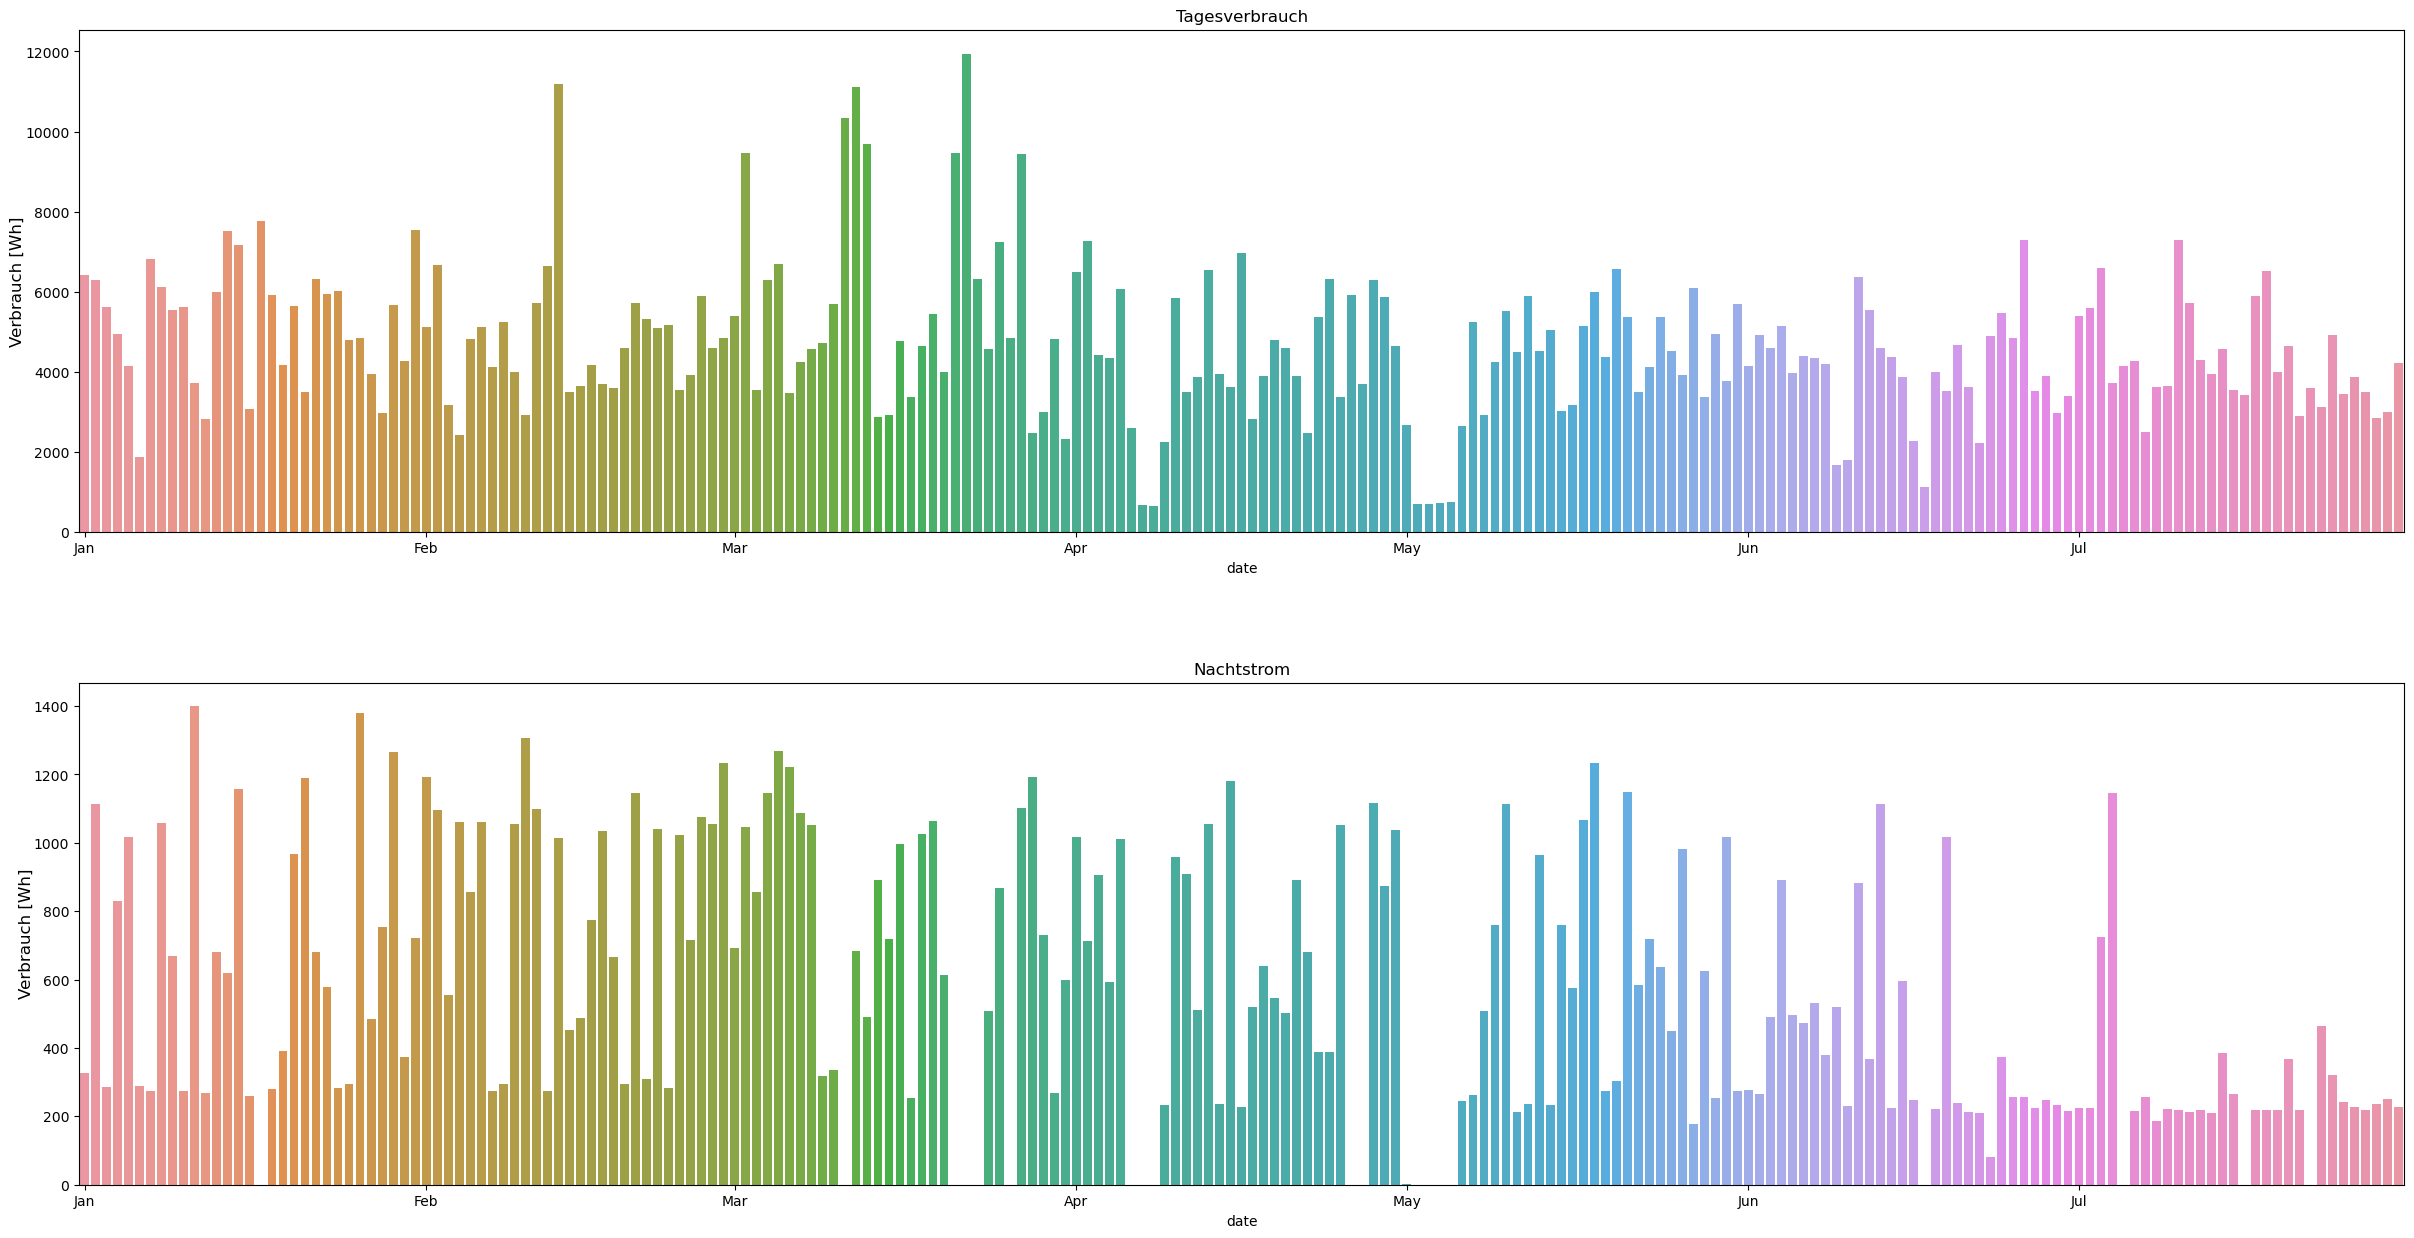

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as md
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize =([30, 15]))

# Gridspec Setup
gs = gridspec.GridSpec(2, 2)
ax = plt.subplot(gs[0, 0])
gs.update(wspace = 0.1, hspace = 0.3)

### AX1 ###
ax1 = plt.subplot(gs[0, :2])
sns.barplot(data=df_day,
            x='date',
            y='verbrauch')
ax1.set_ylabel('Verbrauch [Wh]', labelpad = 0, fontsize = 12)
ax1.xaxis.set_major_locator(md.MonthLocator())
ax1.xaxis.set_major_formatter(md.DateFormatter('%b'))
ax1.set_title('Tagesverbrauch')

### AX2 ###
ax2 = plt.subplot(gs[1, :2])
sns.barplot(data=df_night,
            x='date',
            y='verbrauch')
ax2.set_ylabel('Verbrauch [Wh]', labelpad = 0, fontsize = 12)
ax2.xaxis.set_major_locator(md.MonthLocator())
ax2.xaxis.set_major_formatter(md.DateFormatter('%b'))
ax2.set_title('Nachtstrom')

### Draw Plot ###
plt.show()